1. 数据集准备
除了加载和展示鸢尾花数据集的基本结构，还可以检查数据是否存在缺失值和异常值，并进行数据归一化处理（例如，将特征缩放到相同的范围），以确保模型训练的稳定性。



In [8]:
from sklearn.datasets import load_iris
import pandas as pd

# 加载鸢尾花数据集
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

# 检查缺失值
print("缺失值检测：\n", df.isnull().sum())

# 数据归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[iris.feature_names] = scaler.fit_transform(df[iris.feature_names])

# 查看归一化后的数据集
df.head()


缺失值检测：
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,-0.900681,1.019004,-1.340227,-1.315444,0,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,0,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,0,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,0,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,0,setosa


2. 数据集探索及可视化
深入探索特征之间的关系，例如，通过绘制热力图观察特征之间的相关性，使用箱线图或小提琴图来查看数据的分布。使用PCA（主成分分析）进行数据降维，查看数据的分布情况。

C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24615 (\N{CJK

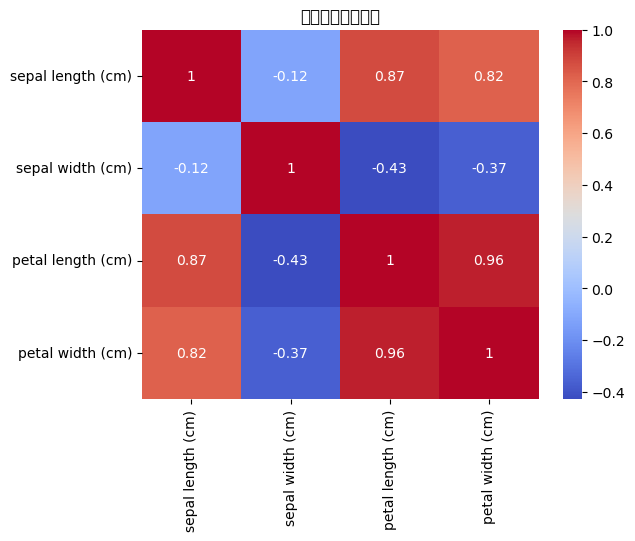

C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32500 (\N{CJK UNIFIED IDEOGRAPH-7EF4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21487 (\N{CJK

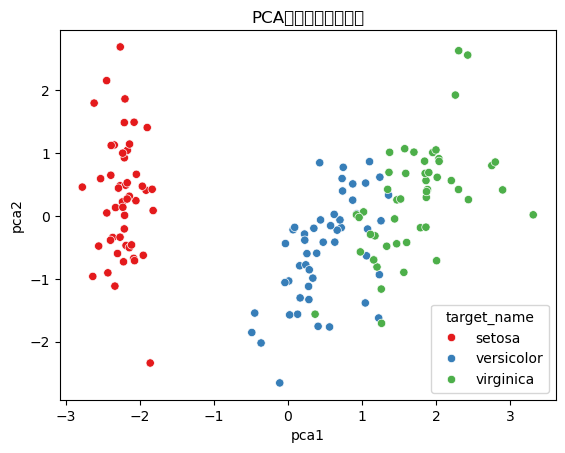

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算相关性并绘制热力图
correlation_matrix = df[iris.feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("特征相关性热力图")
plt.show()

# PCA降维并可视化
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[iris.feature_names])
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

sns.scatterplot(data=df, x='pca1', y='pca2', hue='target_name', palette="Set1")
plt.title("PCA降维后二维可视化")
plt.show()


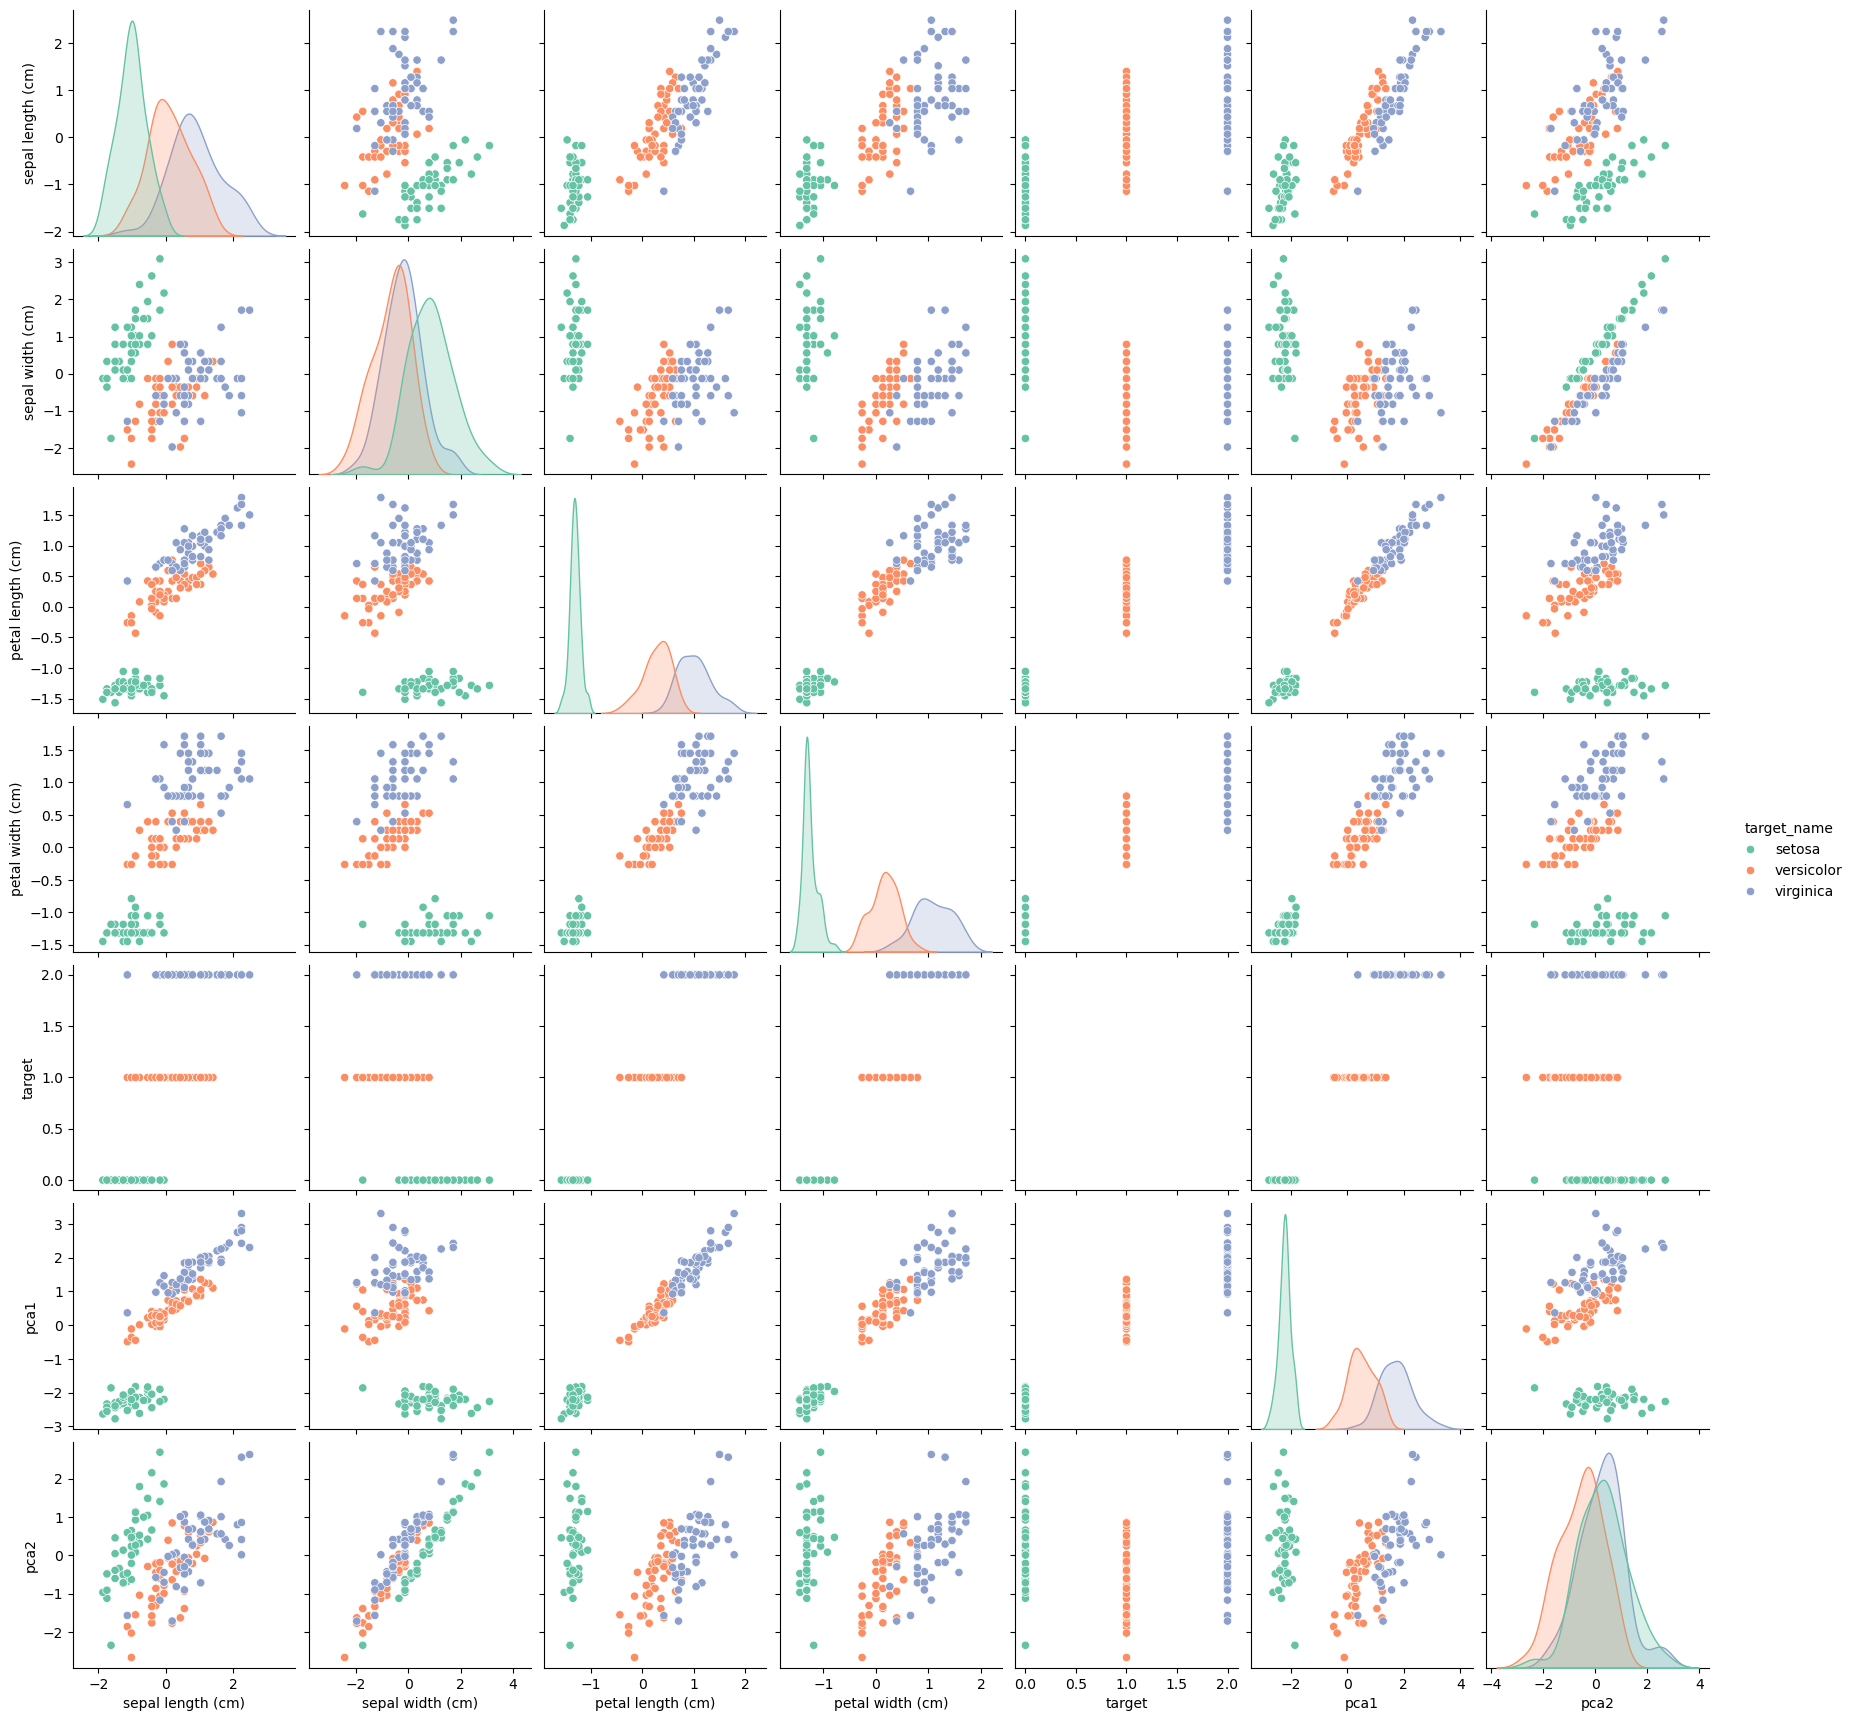

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.468455e-15     -1.823726e-15      -1.610564e-15   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+00     -2.433947e+00      -1.567576e+00   
25%        -9.006812e-01     -5.923730e-01      -1.226552e+00   
50%        -5.250608e-02     -1.319795e-01       3.364776e-01   
75%         6.745011e-01      5.586108e-01       7.627583e-01   
max         2.492019e+00      3.090775e+00       1.785832e+00   

       petal width (cm)      target          pca1          pca2  
count      1.500000e+02  150.000000  1.500000e+02  1.500000e+02  
mean      -9.473903e-16    1.000000  9.473903e-17 -2.960595e-17  
std        1.003350e+00    0.819232  1.714084e+00  9.592523e-01  
min       -1.447076e+00    0.000000 -2.774345e+00 -2.654073e+00  
25%       -1.183812e+00    0.000000 -2.102721e+00 -5.984875e-01  
50%        1.32509

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制各特征的分布图
sns.pairplot(df, hue='target_name', palette="Set2")
plt.show()

# 打印数据的统计信息
print(df.describe())


3. 模型训练
在训练模型时，可以尝试不同的决策树分类器参数设置，尤其是criterion参数，测试不同的分割策略（例如gini和entropy），并观察对模型表现的影响。

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# 使用不同的criterion参数训练模型
criteria = ['gini', 'entropy']
models = {criterion: DecisionTreeClassifier(criterion=criterion, random_state=42) for criterion in criteria}

# 训练并存储模型
for criterion, model in models.items():
    model.fit(X_train, y_train)
    print(f"使用 {criterion} 作为判别准则训练完成。")


使用 gini 作为判别准则训练完成。
使用 entropy 作为判别准则训练完成。


4. 模型测试
使用训练好的不同模型对测试集进行预测，并计算模型的准确率。通过绘制混淆矩阵，观察模型的分类效果是否有偏差。

使用 gini 准则的模型准确率: 1.00


C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28151 (\N{CJK

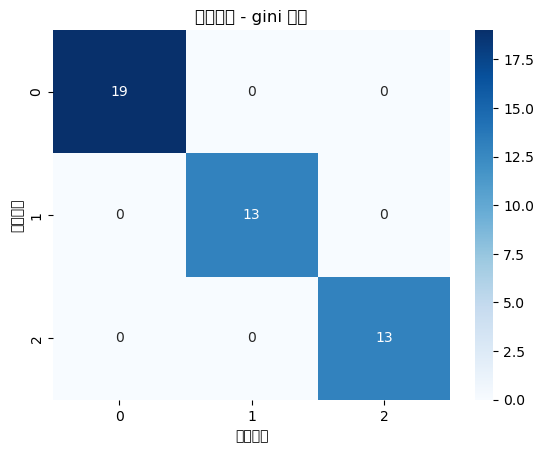

C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28151 (\N{CJK

使用 entropy 准则的模型准确率: 0.98


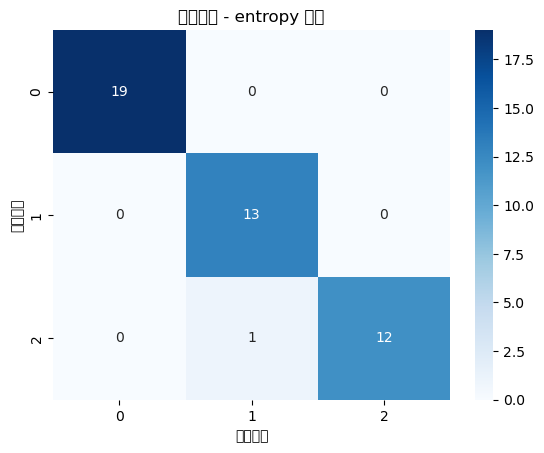

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 测试不同模型并计算准确率
for criterion, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"使用 {criterion} 准则的模型准确率: {accuracy:.2f}")
    
    # 绘制混淆矩阵
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"混淆矩阵 - {criterion} 准则")
    plt.xlabel("预测标签")
    plt.ylabel("真实标签")
    plt.show()



5. 结果分析
通过分类报告详细分析每个类别的性能指标，如精确率、召回率和F1分数，并对比不同准则下的模型表现。此外，可以分析决策树模型的深度、节点数量等特征，以评估模型的复杂度和是否存在过拟合现象。

In [13]:
for criterion, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=iris.target_names)
    print(f"分类报告 - 使用 {criterion} 准则：\n", report)
    
    # 模型的复杂性评估
    print(f"{criterion} 决策树深度：{model.get_depth()}")
    print(f"{criterion} 决策树叶子节点数：{model.get_n_leaves()}")
    print()


分类报告 - 使用 gini 准则：
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

gini 决策树深度：6
gini 决策树叶子节点数：10

分类报告 - 使用 entropy 准则：
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

entropy 决策树深度：7
entropy 决策树叶子节点数：10



未剪枝模型准确率: 0.9777777777777777
未剪枝模型的深度: 4
未剪枝模型的叶子节点数: 8


C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK

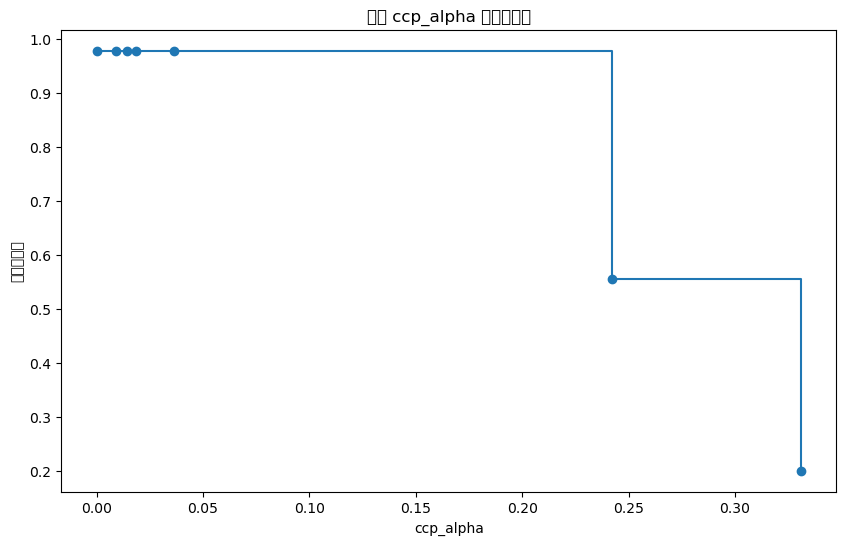


最佳 ccp_alpha 值: 0.0
剪枝后的模型准确率: 0.9777777777777777
剪枝后模型的深度: 4
剪枝后模型的叶子节点数: 8

分类报告:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.89      0.94         9
   virginica       0.95      1.00      0.98        20

    accuracy                           0.98        45
   macro avg       0.98      0.96      0.97        45
weighted avg       0.98      0.98      0.98        45



In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# 定义基础模型，不同剪枝参数的对比
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=90)

# 先训练一个未剪枝的决策树
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 获取未剪枝模型的准确率和复杂度
y_pred = clf.predict(X_test)
print("未剪枝模型准确率:", accuracy_score(y_test, y_pred))
print("未剪枝模型的深度:", clf.get_depth())
print("未剪枝模型的叶子节点数:", clf.get_n_leaves())

# 利用成本复杂度剪枝的路径获取alpha参数
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# 存储不同alpha剪枝后的模型及其准确率
pruned_models = []
accuracies = []

for ccp_alpha in ccp_alphas:
    pruned_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    pruned_clf.fit(X_train, y_train)
    pruned_models.append(pruned_clf)
    y_pred = pruned_clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# 绘制不同alpha值的剪枝效果图
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, accuracies, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("模型准确率")
plt.title("不同 ccp_alpha 的剪枝效果")
plt.show()

# 打印最佳剪枝模型的性能
best_alpha = ccp_alphas[np.argmax(accuracies)]
best_model = pruned_models[np.argmax(accuracies)]

print(f"\n最佳 ccp_alpha 值: {best_alpha}")
print("剪枝后的模型准确率:", accuracies[np.argmax(accuracies)])
print("剪枝后模型的深度:", best_model.get_depth())
print("剪枝后模型的叶子节点数:", best_model.get_n_leaves())

# 输出最佳模型的分类报告
y_pred_best = best_model.predict(X_test)
print("\n分类报告:\n", classification_report(y_test, y_pred_best, target_names=iris.target_names))


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# 预剪枝参数设置
pre_pruning_params = {
    "max_depth": 3,          
    "min_samples_split": 5,  
    "min_samples_leaf": 2,   
    "max_leaf_nodes": 10      
}

# 使用预剪枝参数训练模型
pre_pruned_clf = DecisionTreeClassifier(random_state=42, **pre_pruning_params)
pre_pruned_clf.fit(X_train, y_train)

# 评估模型
y_pred = pre_pruned_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("预剪枝模型准确率:", accuracy)
print("预剪枝模型的深度:", pre_pruned_clf.get_depth())
print("预剪枝模型的叶子节点数:", pre_pruned_clf.get_n_leaves())

# 输出分类报告
print("\n分类报告:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


预剪枝模型准确率: 1.0
预剪枝模型的深度: 3
预剪枝模型的叶子节点数: 5

分类报告:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

